## Liquidation with Permanent Price Impact(Chap 6.5)

### Introduction

This notebook explores  optimal execution strategies in the simpliest setting. The theory is covered in Chap 6.5 of

Algorithmic and High-Frequency Trading (c) Cartea, Jaimungal, & Penalva, 2015 Cambridge University Press

https://www.amazon.co.uk/Algorithmic-High-Frequency-Trading-Mathematics-Finance/dp/1107091144/ref=cm_cr_arp_d_product_top?ie=UTF8

The agent controls their speed of trading $\nu$, and assumes that she receives an execution price of
$$
S_t^{\nu} - k\, Q_t^{\nu}
$$
which is linear in her trading rate to account for the cost of walking the limit order book. Furthermore, her trading induces a drift in the asset price, which is otherwise assmed to be a Brownian motion. Hence, $S^{\nu}_t$ satisfies the SDE
$$
dS_t^\nu = a \,\nu_t\,dt + \sigma \, dW_t
$$
She aims to maximize the  performance criterion 
$$
\mathbb{E}\Big[ X_T^{\nu} + Q_T^{\nu}(S_T^{\nu} - \alpha Q_T^{\nu}) - \phi \int_0^T (Q_u^{\nu})^2\, du\Big]
$$
where $X_T^\nu$ is the total cash from trading, and the term $\alpha\,(Q_T^\nu)^2$ represents a penalty on holding terminal inventory (which we will send to infinity to guarantee liquidation).

### Solving DPE

As shown in the chapter, the dynamic programming principle implies that the value function satisfies the $\textbf{HJB}$ equation
\begin{equation}
0 = (\partial_t + \tfrac{1}{2}\sigma^2\partial_{SS})H - \phi q^2 + \sup_{\nu}\{(\nu(S - f(\nu))\partial_x - g(\nu) \partial_S - \nu \partial_q)H\}
\end{equation}

subject to the terminal condition $H(T,x,S,q) = x + Sq - \alpha q^2$.

For the case of linear impact functions $f(\nu)=k\,\nu$ and $g(\nu)=b\,\nu$, the  $\textbf{DPE}$ can be solved explicitly and the optimal speed to trade is
\begin{equation}
\nu_t^* = \gamma \frac{\zeta e^{\gamma(T-t)} + e^{-\gamma(T-t)}}{\zeta e^{\gamma(T-t)} - e^{-\gamma(T-t)}}\, Q_t^{{\nu}^*}
\end{equation}

From this equation, it is also possible to obtain the agent's inventory $Q_t^{\nu^*}$ that results from following this strategy.

\begin{equation}
Q_t^{\nu^*} = \frac{\zeta e^{\gamma(T-t)} + e^{-\gamma(T-t)}}{\zeta e^{\gamma(T-t)} - e^{-\gamma(T-t)}} \,Q_0.
\end{equation}

The details of the derivations can be found from Page 145 to Page 147.

Now we show the implementation of the optimal speed to trade at and inventory along the optimal strategy in the following code.

In [7]:
# Import necessary libraries.
import numpy as np
import import_ipynb
import Liquidation_Permanent_Price_Impact_helper as lppi_helpers

The following code computes the optimal speed to trade at $\nu_t^*$ and inventory along the optimal strategy $Q_t^{\nu^*}$.

In [8]:
# Parameter settings
T = 1
Ndt = 6.5 * 3600
dt = T / Ndt
t = np.arange(0, T + dt, dt)

k = 0.001
b = 0.001

tau = T - t
tt = np.arange(0, 1 + 1 / 10, 1 / 10)

myphi = np.array([10e-10, 0.001, 0.01, 0.1])
symb = np.array(["o", "*", "+", "^"])

alpha = 100

Now we use show the change of the investor's inventory along the optimal path for various levels of the running penalty $\phi$ as $\alpha$ changes.

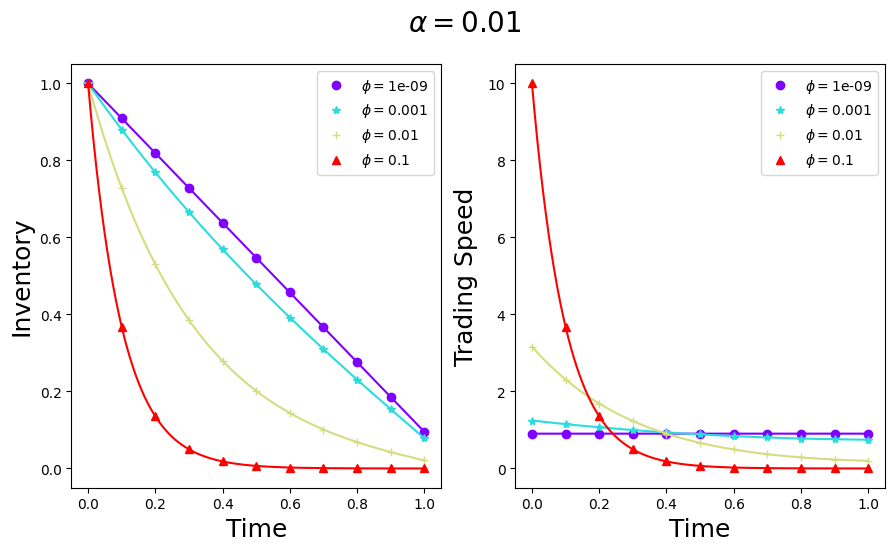

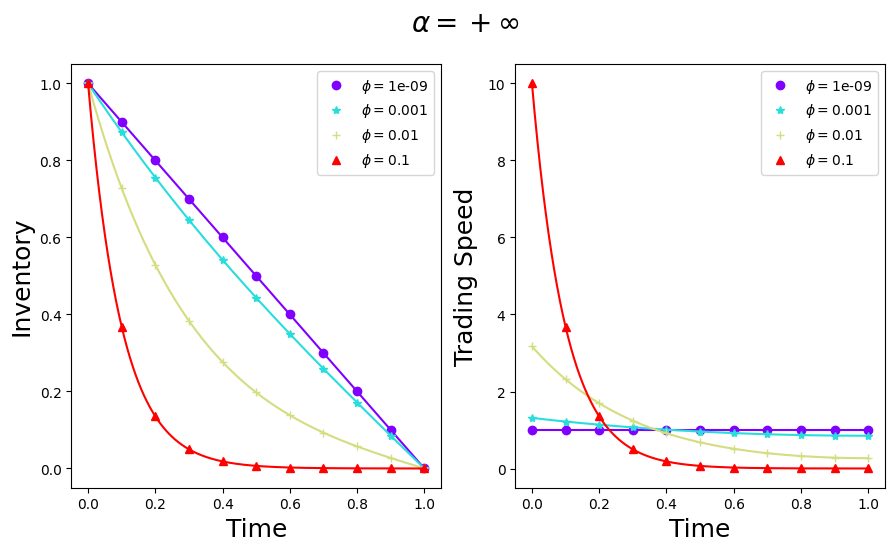

In [9]:
# Fig 6.2 of Page 148
lppi_helpers.plot_inventory_trading_speed(0.01, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = 0.01$")
lppi_helpers.plot_inventory_trading_speed(100, myphi, symb, t, tt, T, b, k, [r"$\phi = $" + str(i) for i in myphi], main=r"$\alpha = +\infty$")

### Non-Linear Temporary Price Impact

Now we assume the price impact function $f(v)$ to be non-linear and look at its effect on the optimal strategy.

The agent's performance criteria is again
$$
\mathbb{E}\Big[ X_T^{\nu} + Q_T^{\nu}(S_T^{\nu} - \alpha Q_T^{\nu}) - \phi \int_0^T (Q_u^{\nu})^2\, du\Big]
$$
and the dynamics of $S^{\nu}$, $X^{\nu}$ and $Q^{\nu}$ are with the explicit non-linear impact model written in place:
$$
dS_t^{\nu} = -b \nu_t dt + \sigma dW_t, \\
dX_t^{\nu} = (S_t^{\nu} - f(\nu_t)) \nu_t dt, \\
dQ_t^{\nu} = - \nu_t dt.
$$
Applying $\textbf{DPP}$, then, denote $F(\nu)=\nu f(\nu)$, and assuming $\nu f(\nu)$ is convex, we can write the non-linear $\textbf{PDE}$ for $h$ as
$$
\partial_th - \phi q^2 + F^*(-(bq + \partial_q h)) = 0, \quad h(t,q) = -\alpha q^2
$$
where $F^*(u)$ is the Legendre-Fenchel dual of $F(x)$. The detailed derivation can be found from Page 152 to Page 154.

As an example, for power impact model we write $f(x)= k x^a$, and so $F(x)= k x^{1+a}$. Then, 
$$
F^*(y) = \sup_x(xy - k x^{1+a}).
$$
First order condtion implies 
$$
x^* = \Big ( \frac{y}{(1+a)k} \Big )^{\frac{1}{a}},
$$
and so
$$
F^*(y) = \xi y^{1 + \frac{1}{a}},  \quad  \xi = \frac{ak}{((1+a)k)^{1+\frac{1}{a}}}
$$
and the optimal trading speed in feedback form is 
$$
\nu^* = \Big ( -\frac{bq + \partial_q h}{(1 + a) k} \Big )^{\frac{1}{a}}.
$$

Now we demonstrate the effect of non-linear impact on the optimal strategy in the case of a power law temporary impact function with power parameter $a$. The model parameters are 
$b=k=10^{-4}$, $\phi = 10 k$, $\alpha = 100 k$, and $T=1$.

In [5]:
# Parameter Settings
a = np.array([1, 0.8, 0.6])
k = 0.0001
b = 0.0001

phi = 10 * k
alpha = 100 * k
T = 1
qmax = 1

Ndt = 10000
Ndq = 100

dt = T / Ndt
dq = qmax / Ndq

The curves below are obtained by numerically solving the $\textbf{PDE}$ with a finite difference scheme, substituting the solution to the optimal trading speed in feedback form, and then numerically integrating $dQ_t^{\nu^*} = -\nu_t^*dt$, with $Q_0^{\nu^*} = 1$, to obtain $Q_t^{\nu^*}$.

In [6]:
nus, Qs, myleg, t, q = lppi_helpers.solve_pde(T, dt, qmax, dq, k, a, b, alpha, phi, Ndt, Ndq)

Plot the optimal speed to trade at vs time.

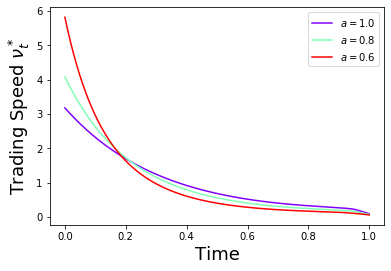

In [7]:
lppi_helpers.plot_multiple(t, nus.T, r"Time", r"Trading Speed $\nu^*_t$", None, myleg)

Plot the inventory along the optimal strategy vs time.

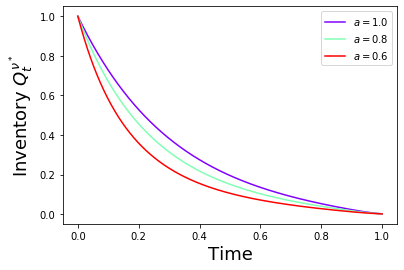

In [8]:
# Fig 6.4 of Page 154
lppi_helpers.plot_multiple(t, Qs.T, r"Time", r"Inventory $Q_t^{\nu^*}$", None, myleg)